# **IMAGE CLASSIFICATION**

This was a deep learning project for classifying images of happy and sad people using Convulational Neural Network (CNN). This was done by following a guide from a Youtube tutorial done by Nicholas Renotte.

 <a href='https://www.youtube.com/watch?v=jztwpsIzEGc&t=1630s'>Link for youtube tutorial</a>

### By: <a href="https://github.com/edw4rd14">Edw4rd14</a>

In [49]:
import tensorflow as tf
import os
import seaborn as sns

## **SETUP AND LOAD DATA**

**LIMIT GPU USAGE**

In [22]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

**REMOVE DODGY IMAGES**

In [23]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [24]:
data_dir = "data"
image_exts = ['jpeg','jpg','bmp','png']

In [25]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image is not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image: {}".format(image_path))
            # os.remove(image_path)

**LOAD DATA**

In [26]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [27]:
import numpy

In [28]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 282 files belonging to 2 classes.


In [29]:
data_iterator = data.as_numpy_iterator()

In [30]:
# Rerun to get another batch from the iterator
batch = data_iterator.next()

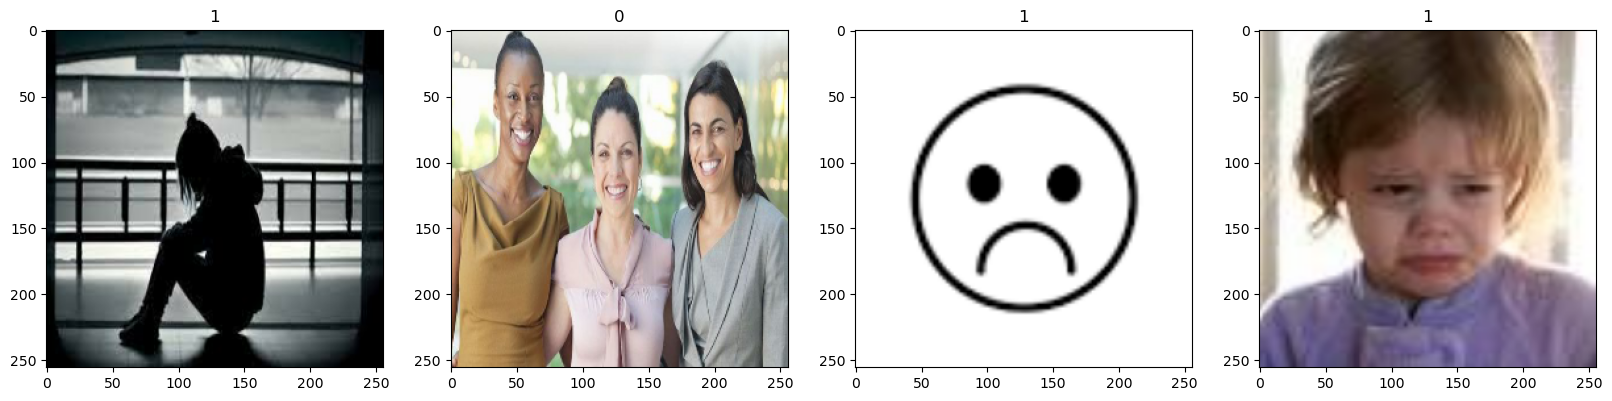

In [31]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Class 0 = Happy | Class 1 = Sad

## **PREPROCESS DATA**

**SCALE DATA**

In [32]:
data = data.map(lambda x,y: (x/255,y))

In [33]:
scaled_iterator = data.as_numpy_iterator()

In [34]:
batch = scaled_iterator.next()

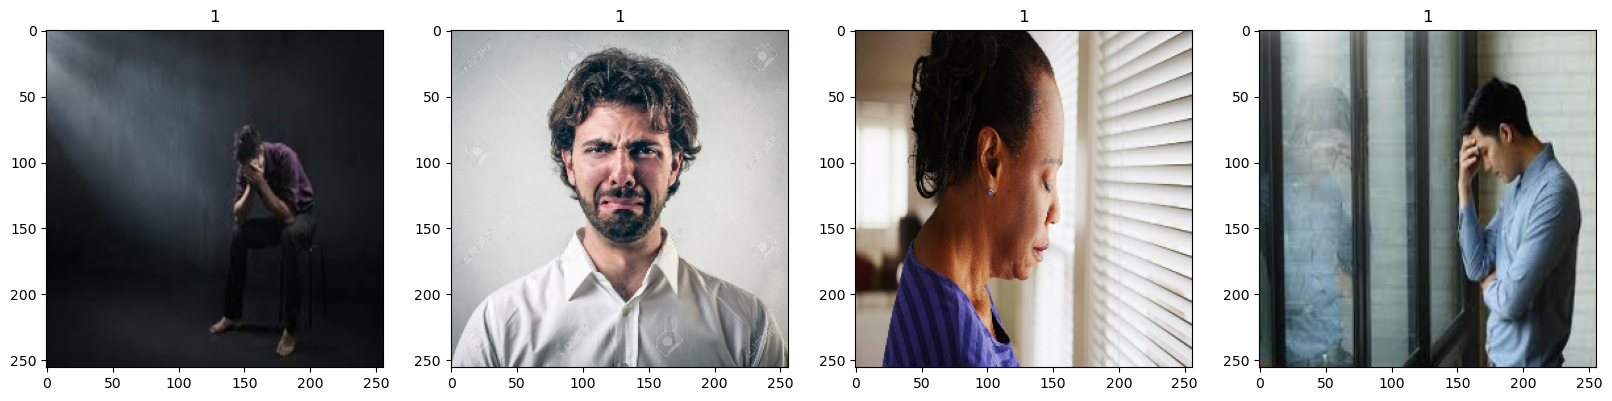

In [35]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

**SPLIT DATA**

In [36]:
len(data)

9

In [37]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1

In [38]:
print("Train set is",train_size,"batches")
print("Validation set is",val_size,"batches")
print("Test set is",test_size,"batches")

Train set is 6 batches
Validation set is 2 batches
Test set is 1 batches


In [39]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**DEEP MODEL**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [41]:
model = Sequential()

In [42]:
# CNN 
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [43]:
model.compile("adam",loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [47]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


6/6 [==============================] - 11s 1s/step - loss: 1.0697 - accuracy: 0.5156 - val_loss: 0.6484 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 8s 980ms/step - loss: 0.6594 - accuracy: 0.4844 - val_loss: 0.6019 - val_accuracy: 0.7188
Epoch 3/20
6/6 [==============================] - 7s 1s/step - loss: 0.5971 - accuracy: 0.7656 - val_loss: 0.5077 - val_accuracy: 0.7969
Epoch 4/20
6/6 [==============================] - 7s 963ms/step - loss: 0.5032 - accuracy: 0.7708 - val_loss: 0.4030 - val_accuracy: 0.9219
Epoch 5/20
6/6 [==============================] - 7s 947ms/step - loss: 0.3976 - accuracy: 0.8594 - val_loss: 0.2699 - val_accuracy: 0.9375
Epoch 6/20
6/6 [==============================] - 11s 2s/step - loss: 0.2898 - accuracy: 0.9219 - val_loss: 0.2530 - val_accuracy: 0.9375
Epoch 7/20
6/6 [==============================] - 13s 2s/step - loss: 0.2139 - accuracy: 0.9167 - val_loss: 0.1431 - val_accuracy: 0.9688
Epoch 8/20
6/6 [========================

View Performance of Training Model

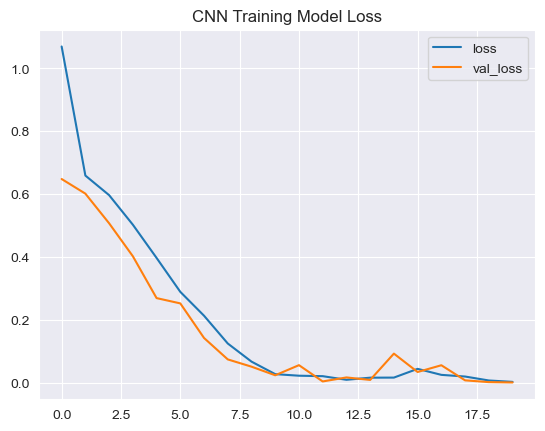

In [61]:
sns.set_style("darkgrid")
sns.lineplot(data=hist.history['loss'], label='loss')
sns.lineplot(data=hist.history['val_loss'], label='val_loss').set(title="CNN Training Model Loss")
plt.show()

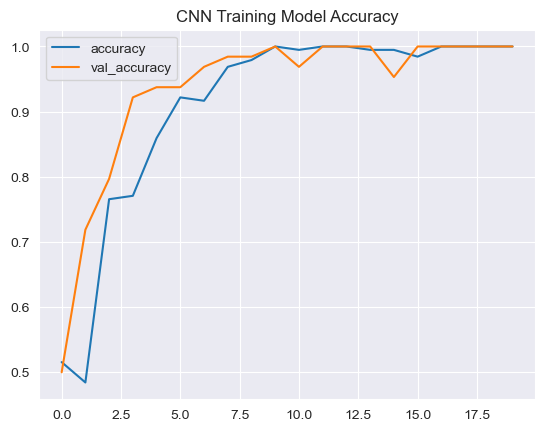

In [62]:
sns.set_style("darkgrid")
sns.lineplot(data=hist.history['accuracy'], label='accuracy')
sns.lineplot(data=hist.history['val_accuracy'], label='val_accuracy').set(title="CNN Training Model Accuracy")
plt.show()

**MODEL EVALUATION**

In [65]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [66]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [67]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 151ms/step


In [73]:
print(f"Precision: {precision.result().numpy()} \nRecall: {recall.result().numpy()} \nAccuracy: {acc.result().numpy()}")

Precision: 1.0 
Recall: 1.0 
Accuracy: 1.0


Testing with random test image (happy)

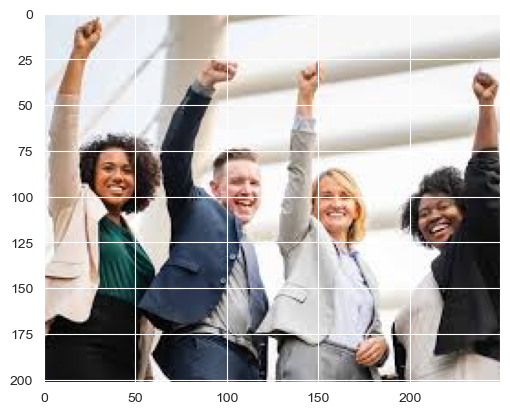

In [80]:
img = cv2.imread("./data/happy_test.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

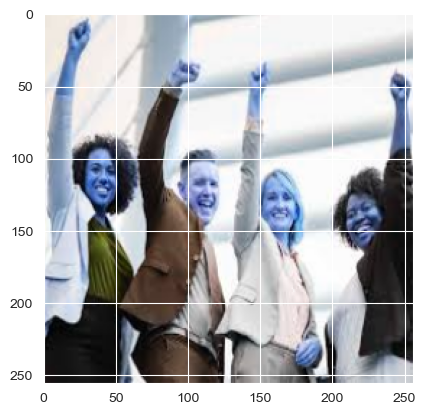

In [84]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [89]:
resize.shape

TensorShape([256, 256, 3])

In [88]:
import numpy as np
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [90]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 44ms/step


In [95]:
if yhat > 0.5:
    print("Predicted class is Sad")
else:
    print("Predicted class is Happy")

Predicted class is Happy


Testing with random test image (sad)

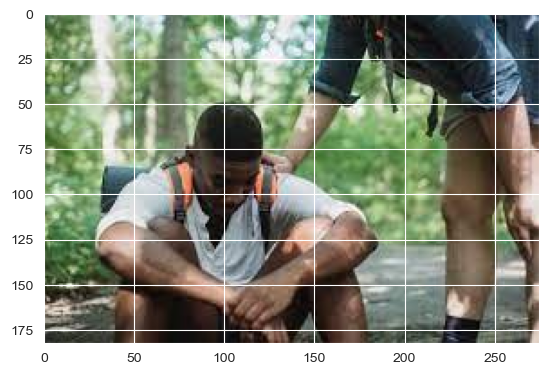

In [96]:
img = cv2.imread("./data/sad_test.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

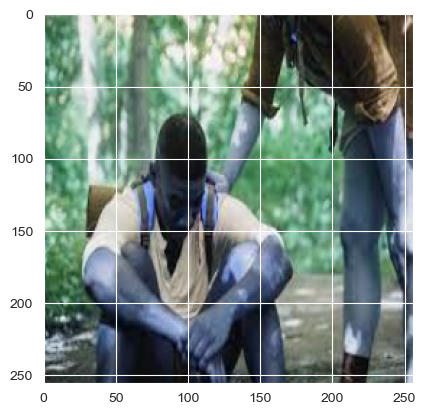

In [97]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [98]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 50ms/step


In [99]:
if yhat > 0.5:
    print("Predicted class is Sad")
else:
    print("Predicted class is Happy")

Predicted class is Sad


**SAVE MODEL**

In [102]:
from tensorflow.keras.models import load_model

In [100]:
model.save(os.path.join("models","happysadimageclassificationmodel.h5"))

c:\Users\edw4r\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**LOAD MODEL**

In [103]:
new_model = load_model(os.path.join("models","happysadimageclassificationmodel.h5"))

In [110]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [108]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 47ms/step


In [109]:
if yhat_new > 0.5:
    print("Predicted class is Sad")
else:
    print("Predicted class is Happy")

Predicted class is Sad


<p style='text-align: center; font-weight: bold'>END.